Spotipy API

In [159]:
#Importing neccesary libraries
import json
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import numpy as np
import os

In [160]:
#Redirect_URI = "https://localhost:8080/callback"
Client_ID = "c71bae50194549399a615967e53c6450"
Redirect_URI = "http://localhost:8080/callback/"


In [161]:
with open('Spotify_secret.json', "r") as f:
    secret = json.load(f)

In [162]:
secret["secret"]

'20adff09ca8a475ab94c13cede1ee868'

In [163]:
ls

Data/                        Spotify_Project 1 (1).ipynb
LICENSE                      Spotify_secret.json
README.md                    ~$otify_secret_txt.md


In [164]:

os.getcwd()

'/Users/kristinjohansen/Documents/Coding Projects Github/Spotify api project/spotify_api_project'

In [165]:
# soptify app keys
sp_auth = spotipy.SpotifyOAuth(client_id = Client_ID,
                      client_secret = secret["secret"],
                      scope = 'user-read-recently-played,user-top-read',
                      redirect_uri = Redirect_URI)

In [166]:
# get authorizatgion 

#sp_auth.get_authorization_code()
sp_auth.get_auth_response()

'AQDycSn5ZtLkOAF50W7aJ2kL3jRN1QXj13W6NfU6AKHK0CO6p3GsNrf4Pdm2yg-kSn1_s-0KikzWz3N4IEvGojLS0auNFPf07u1e0dFt6QWIGWIIQQQNrgB2x6fb3pKkEeT-Hl2NbIfEWlkK3qHIpUKgWakO5ZE9RrhEjLxvyqHsmec_JyJan79hOIfGtkvpM1dnRRXrtjj-V_PT000imAPOrrWtKBPyMip9Dhg'

In [167]:
# work with data
# extra access via "current_user_recently_played()"
sp = spotipy.Spotify(auth_manager = sp_auth)

In [168]:
sp.current_user()

{'display_name': 'Kristin Bjørkhaug Johansen',
 'external_urls': {'spotify': 'https://open.spotify.com/user/1199800973'},
 'followers': {'href': None, 'total': 2},
 'href': 'https://api.spotify.com/v1/users/1199800973',
 'id': '1199800973',
 'images': [{'height': None,
   'url': 'https://scontent-ams2-1.xx.fbcdn.net/v/t1.6435-1/106509755_3120303878035800_7198362888784915788_n.jpg?stp=dst-jpg_s320x320&_nc_cat=105&ccb=1-7&_nc_sid=0c64ff&_nc_ohc=Xqxr2xvy89UAX9k5NfX&_nc_ht=scontent-ams2-1.xx&edm=AP4hL3IEAAAA&oh=00_AfA57PllknCd3FkeQxeDvgzmEsLeHDt7UVcrtufFCiRsMA&oe=644C257C',
   'width': None}],
 'type': 'user',
 'uri': 'spotify:user:1199800973'}

In [169]:

data_folder = "Data"
dataset1_filename = "Top_40_tracks.csv"
dataset2_filename = "Top_song_features.csv"

if os.path.exists(os.path.join(data_folder, dataset1_filename)) and os.path.exists(os.path.join(data_folder, dataset2_filename)):
    # Load both datasets
    dataset1 = pd.read_csv(os.path.join(data_folder, dataset1_filename))
    dataset2 = pd.read_csv(os.path.join(data_folder, dataset2_filename))
    print("Loaded both datasets")
elif os.path.exists(os.path.join(data_folder, dataset1_filename)):
    # Load dataset 1 only
    dataset1 = pd.read_csv(os.path.join(data_folder, dataset1_filename))
    print("Loaded dataset 1")
elif os.path.exists(os.path.join(data_folder, dataset2_filename)):
    # Load dataset 2 only
    dataset2 = pd.read_csv(os.path.join(data_folder, dataset2_filename))
    print("Loaded dataset 2")

Loaded both datasets


In [170]:

my_top_songs = sp.current_user_top_tracks(limit = 20, time_range = "long_term")


In [171]:
dl_top = []
    
for item in my_top_songs["items"]:
    d = {}
    d["track_title"] = item["name"]
    da = []
    for artist in item["artists"]:
        da.append(artist["name"])
    d["artists"] = da
    d["popularity"] = item["popularity"]
    d["uri"] = item["uri"]
    d["duration"] = item["duration_ms"]
    dl_top.append(d)
my_top_songs_df = pd.DataFrame(dl_top)

In [172]:
#Save dataset for top songs
my_top_songs_df.to_csv("Data/Top_20_tracks.csv")
Dataset_1 = pd.read_csv("Data/Top_20_tracks.csv")

In [173]:
features = sp.audio_features(my_top_songs_df['uri'])

In [174]:
Df_features = pd.DataFrame(features)

In [175]:
#Save dataset for features
Df_features.to_csv("Data/Top_song_features.csv")

In [176]:
Dataset_2 = pd.read_csv("Data/Top_song_features.csv")

In [177]:
Dataset_1

,Unnamed: 0,track_title,artists,popularity,uri,duration
0,0,bright side of the moon,['Christian French'],46,spotify:track:5r4G5w8ujwefEnrCT5uzoX,190661
1,1,TV Dream,['Larkins'],0,spotify:track:52zQtUaYzFCHWP7Jzi24pz,226666
2,2,Share Your Address,['Ben Platt'],53,spotify:track:74IgSPXYXx7v95NpCzGgsW,182466
3,3,Preacher Man,['THE DRIVER ERA'],51,spotify:track:0oeW7qeQnBULDmDWsq4w5o,219389
4,4,Killer Queen,['5 Seconds of Summer'],52,spotify:track:0SA903LGHxe4ExdRY2SqVH,199357
5,5,Power Over Me,['Dermot Kennedy'],73,spotify:track:4tViDtaHuSLnh7HVJTrKhs,206960
6,6,The Edge,['Panicland'],14,spotify:track:3V7fPYLX3zQB2c0h5GGVoK,212310
7,7,Dying in LA,['Panic! At The Disco'],55,spotify:track:18xmRkPWE0sGUzFyNNAAhN,229053
8,8,It's Alright,['Mother Mother'],61,spotify:track:1NCZMAnGrzUmpBzkBlJjNw,175000
9,9,Roaring 20s,['Panic! At The Disco'],59,spotify:track:0wdV94AXGRphrbkDWLNzVC,186600


Text(0.5, 1.0, 'My top 20 spotify songs')

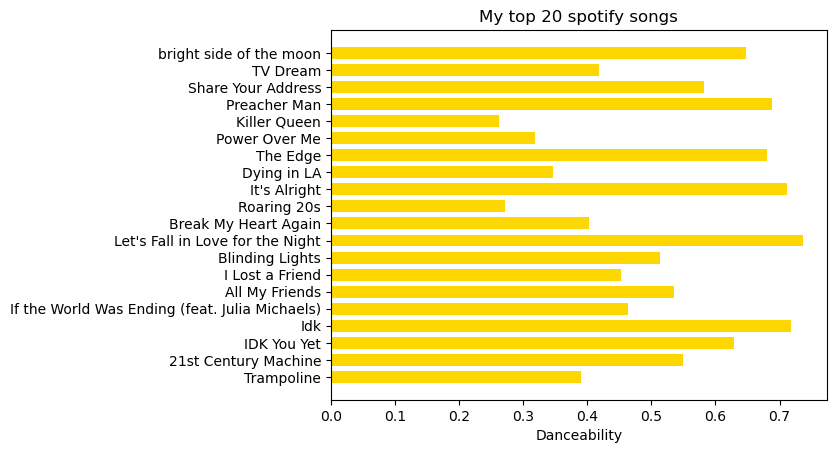

In [194]:
#Visualization
plt.barh(my_top_songs_df['track_title'], Df_features['danceability'], height = 0.7, color = '#FFD700')
plt.gca().invert_yaxis()
plt.xlabel('Danceability')
plt.title('My top 20 spotify songs')

In [179]:
def generate_scatter_plot(Dataset_1, Dataset_2):
    x = Dataset_1['x_column'].values
    y = Dataset_2['y_column'].values
    plt.scatter(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Scatter Plot')